## Import necessary libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch

In [59]:
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [60]:
Crime = pd.read_csv('crime_data.csv')
Crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


## Data understanding

In [61]:
Crime.shape

(50, 5)

In [62]:
Crime.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [63]:
Crime.describe(include='all')

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
count,50,50.00000,50.000000,50.000000,50.000000
unique,50,NaN,NaN,NaN,NaN
top,Alabama,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,7.78800,170.760000,65.540000,21.232000
std,NaN,4.35551,83.337661,14.474763,9.366385
min,NaN,0.80000,45.000000,32.000000,7.300000
25%,NaN,4.07500,109.000000,54.500000,15.075000
50%,NaN,7.25000,159.000000,66.000000,20.100000
75%,NaN,11.25000,249.000000,77.750000,26.175000


In [64]:
Crime.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

## Data preparation

In [65]:
Crime = Crime.drop(['Unnamed: 0'],axis=1)
Crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [66]:
Crime['Murder'] = Crime.Murder.astype('int')
Crime['Rape'] = Crime.Rape.astype('int')

In [67]:
Crime.dtypes

Murder      int32
Assault     int64
UrbanPop    int64
Rape        int32
dtype: object

In [68]:
# normalize heterogenous numerical data by using Standard Scaler

scaler = StandardScaler()
Crime_scaler = scaler.fit_transform(Crime)

In [69]:
#Use Elbow Graph to find optimum number of clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS

In [70]:
# Within-cluster sum-of-squares criterion

wcss=[]
for i in range (1,5):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(Crime)
    wcss.append(kmeans.inertia_)

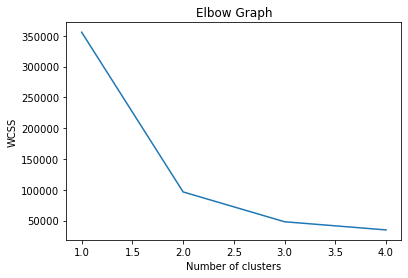

In [71]:
plt.plot(range(1,5),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


### Build Cluster algorithm using K=2

In [72]:
clusters_4=KMeans(2,random_state=30).fit(Crime_scaler)
clusters_4

KMeans(n_clusters=2, random_state=30)

In [73]:
clusters_4.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [74]:
# Assign clusters to the dataset

Crime = Crime.copy()
Crime['clusters_4_id']=clusters_4.labels_
Crime

,Murder,Assault,UrbanPop,Rape,clusters_4_id
0,13,236,58,21,1
1,10,263,48,44,1
2,8,294,80,31,1
3,8,190,50,19,0
4,9,276,91,40,1
5,7,204,78,38,1
6,3,110,77,11,0
7,5,238,72,15,0
8,15,335,80,31,1
9,17,211,60,25,1


In [75]:
clusters_4.cluster_centers_

array([[-0.68368587, -0.68274685, -0.13306084, -0.5721171 ],
       [ 1.0255288 ,  1.02412028,  0.19959126,  0.85817565]])

In [76]:
Crime.groupby('clusters_4_id').agg(['mean']).reset_index()

,clusters_4_id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,4.433333,114.433333,63.633333,15.5
1,1,11.900000,255.250000,68.400000,28.8


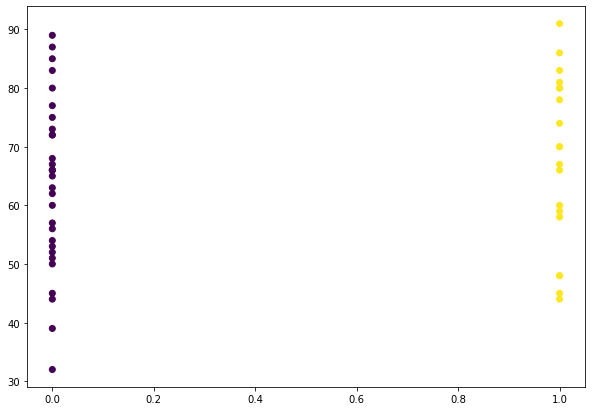

In [77]:
#Plot clusters

plt.figure(figsize=(10,7))
plt.scatter(Crime['clusters_4_id'],Crime['UrbanPop'], c=clusters_4.labels_)

## Build cluster algorithm using K=3

In [78]:
# Cluster algorithm using K=5

clusters_5=KMeans(3,random_state=30).fit(Crime_scaler)
clusters_5

KMeans(n_clusters=3, random_state=30)

In [79]:
clusters_5.labels_

array([2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 1, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2,
       1, 2, 2, 1, 1, 2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 2, 0,
       1, 0, 0, 1, 1, 0])

In [80]:
# Assign clusters to the dataset

Crime = Crime.copy()
Crime['clusters_5_id']=clusters_5.labels_
Crime

,Murder,Assault,UrbanPop,Rape,clusters_4_id,clusters_5_id
0,13,236,58,21,1,2
1,10,263,48,44,1,2
2,8,294,80,31,1,2
3,8,190,50,19,0,0
4,9,276,91,40,1,2
5,7,204,78,38,1,2
6,3,110,77,11,0,0
7,5,238,72,15,0,0
8,15,335,80,31,1,2
9,17,211,60,25,1,2


In [81]:
# Compute the centroids for K=5 clusters with 11 variables

clusters_5.cluster_centers_

array([[-0.45971052, -0.35003177,  0.48366603, -0.25898357],
       [-0.9765767 , -1.11783581, -0.93954982, -0.98159941],
       [ 1.0255288 ,  1.02412028,  0.19959126,  0.85817565]])

In [82]:
# Group data by Clusters (K=5)

Crime.groupby('clusters_5_id').agg(['mean']).reset_index()

,clusters_5_id,Murder,Assault,UrbanPop,Rape,clusters_4_id
,,mean,mean,mean,mean,mean
0,0,5.411765,141.882353,72.470588,18.411765,0
1,1,3.153846,78.538462,52.076923,11.692308,0
2,2,11.900000,255.250000,68.400000,28.800000,1


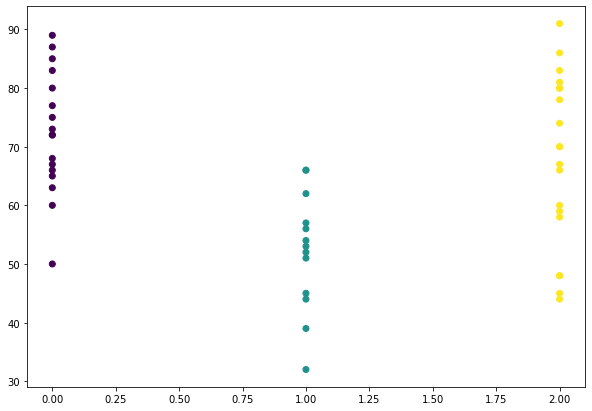

In [83]:
# plot Clusters

plt.figure(figsize=(10,7))
plt.scatter(Crime['clusters_5_id'],Crime['UrbanPop'], c=clusters_5.labels_)

## DBSCAN Clustering

In [84]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(Crime_scaler)

DBSCAN(eps=0.8, min_samples=6)

In [85]:
#Noisy samples are given the label -1.

dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
        0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0],
      dtype=int64)

In [86]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [87]:
Crime = pd.concat([Crime,cl],axis=1)
Crime

,Murder,Assault,UrbanPop,Rape,clusters_4_id,clusters_5_id,cluster
0,13,236,58,21,1,2,-1
1,10,263,48,44,1,2,-1
2,8,294,80,31,1,2,-1
3,8,190,50,19,0,0,-1
4,9,276,91,40,1,2,-1
5,7,204,78,38,1,2,-1
6,3,110,77,11,0,0,-1
7,5,238,72,15,0,0,-1
8,15,335,80,31,1,2,-1
9,17,211,60,25,1,2,-1


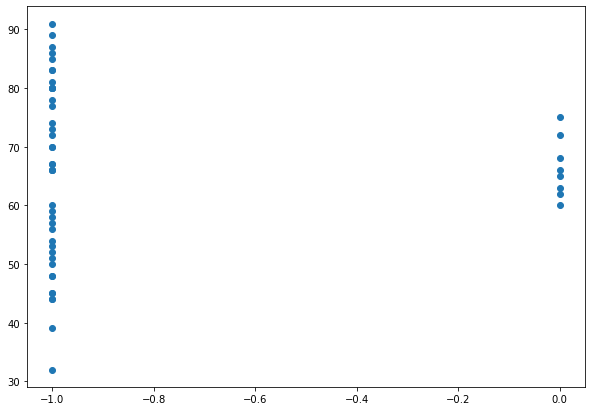

In [89]:
# Plot Clusters

plt.figure(figsize=(10,7))
plt.scatter(Crime['cluster'],Crime['UrbanPop'])

## Hierarchical Clustering

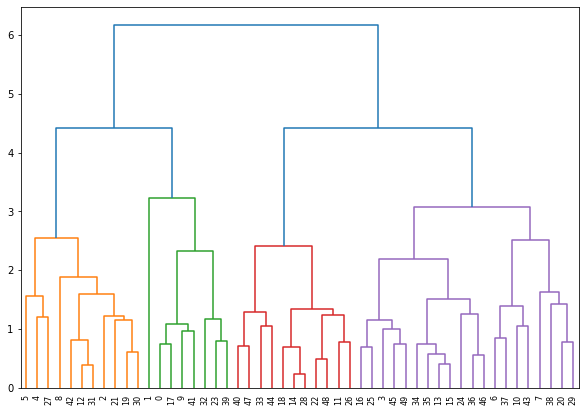

In [91]:
plt.figure(figsize=(10,7))
dendograms=sch.dendrogram(sch.linkage(Crime_scaler,'complete',))
plt.show()

In [92]:
# Create Clusters (y)

hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=5)

In [93]:
y=pd.DataFrame(hclusters.fit_predict(Crime_scaler),columns=['cluster'])
y['cluster'].value_counts()

0    15
1    11
3    10
2     7
4     7
Name: cluster, dtype: int64

In [94]:
# adding clusters to dataset

Crime['cluster']=hclusters.labels_
Crime

,Murder,Assault,UrbanPop,Rape,clusters_4_id,clusters_5_id,cluster
0,13,236,58,21,1,2,2
1,10,263,48,44,1,2,0
2,8,294,80,31,1,2,0
3,8,190,50,19,0,0,3
4,9,276,91,40,1,2,0
5,7,204,78,38,1,2,0
6,3,110,77,11,0,0,4
7,5,238,72,15,0,0,4
8,15,335,80,31,1,2,0
9,17,211,60,25,1,2,2


In [96]:
Crime.groupby('cluster').agg(['mean']).reset_index()

,cluster,Murder,Assault,UrbanPop,Rape,clusters_4_id,clusters_5_id
,,mean,mean,mean,mean,mean,mean
0,0,9.666667,243.333333,75.200000,32.133333,0.866667,1.733333
1,1,2.363636,73.000000,52.000000,10.909091,0.000000,1.000000
2,2,14.428571,251.285714,54.285714,21.285714,1.000000,2.000000
3,3,6.900000,133.000000,62.400000,18.000000,0.000000,0.200000
4,4,4.285714,142.285714,81.857143,15.714286,0.000000,0.000000


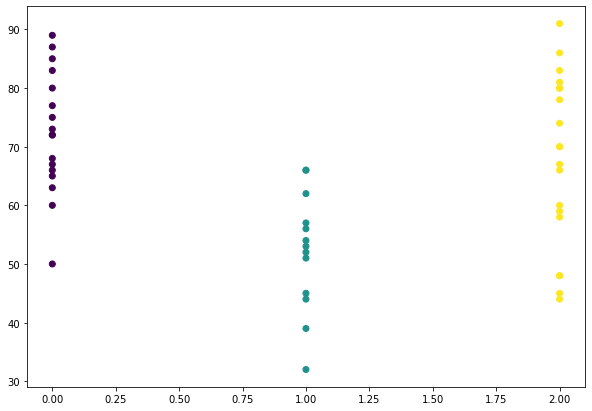

In [97]:
# plot Clusters

plt.figure(figsize=(10,7))
plt.scatter(Crime['clusters_5_id'],Crime['UrbanPop'], c=clusters_5.labels_)

# ---------------------------------------------------------------------------------------------